**Iris Flower Classification**

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.



Although the Scikit-learn library provides a dataset for iris flower classification, you can also
download the same dataset from here for the task of iris flower classification with Machine
Learning.



Download Dataset from https://www.kaggle.com/datasets/saurabh00007/iriscsv


In [ ]:
# @title Iris Flower Classification
# @title  {"vertical-output":true}
variable_name = ""
variable_name = ""
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
agg_funcs = {
    'SepalLengthCm': ['min', 'max', 'mean', 'std'],
    'SepalWidthCm': ['min', 'max', 'mean', 'std'],
    'PetalLengthCm': ['min', 'max', 'mean', 'std'],
    'PetalWidthCm': ['min', 'max', 'mean', 'std']
}


grouped_data = df.groupby('Species').agg(agg_funcs)

# Rename the columns for clarity
grouped_data.columns = ['Min_SepalLengthCm', 'Max_SepalLengthCm',
                        'Mean_SepalLengthCm', 'Std_SepalLengthCm',
                        'Min_SepalWidthCm', 'Max_SepalWidthCm',
                        'Mean_SepalWidthCm', 'Std_SepalWidthCm',
                        'Min_PetalLengthCm', 'Max_PetalLengthCm',
                        'Mean_PetalLengthCm', 'Std_PetalLengthCm',
                        'Min_PetalWidthCm', 'Max_PetalWidthCm',
                        'Mean_PetalWidthCm', 'Std_PetalWidthCm']


grouped_data.reset_index(inplace=True)


print(grouped_data)

           Species  Min_SepalLengthCm  Max_SepalLengthCm  Mean_SepalLengthCm  \
0      Iris-setosa                4.3                5.8               5.006   
1  Iris-versicolor                4.9                7.0               5.936   
2   Iris-virginica                4.9                7.9               6.588   

   Std_SepalLengthCm  Min_SepalWidthCm  Max_SepalWidthCm  Mean_SepalWidthCm  \
0           0.352490               2.3               4.4              3.418   
1           0.516171               2.0               3.4              2.770   
2           0.635880               2.2               3.8              2.974   

   Std_SepalWidthCm  Min_PetalLengthCm  Max_PetalLengthCm  Mean_PetalLengthCm  \
0          0.381024                1.0                1.9               1.464   
1          0.313798                3.0                5.1               4.260   
2          0.322497                4.5                6.9               5.552   

   Std_PetalLengthCm  Min_PetalWidthC

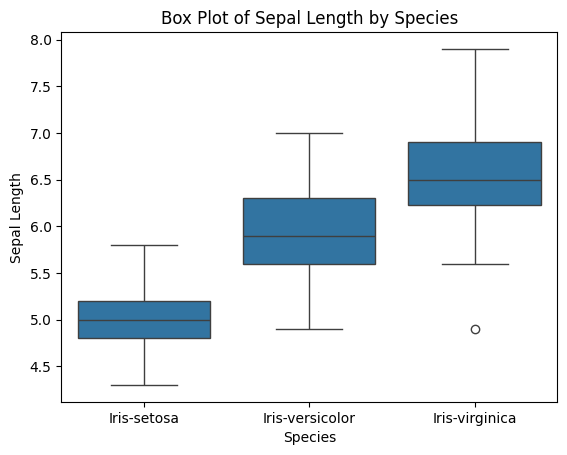

In [ ]:
sns.boxplot(data=df, x="Species", y="SepalLengthCm")

# Add title and labels
plt.title("Box Plot of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")

# Show plot
plt.show()

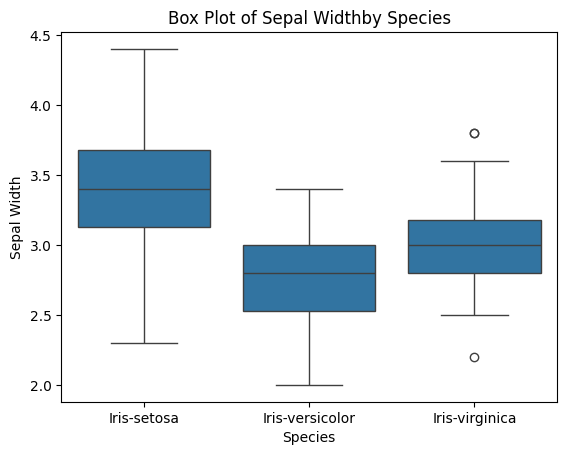

In [ ]:
sns.boxplot(data=df, x="Species", y="SepalWidthCm")

# Add title and labels
plt.title("Box Plot of Sepal Widthby Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")

# Show plot
plt.show()

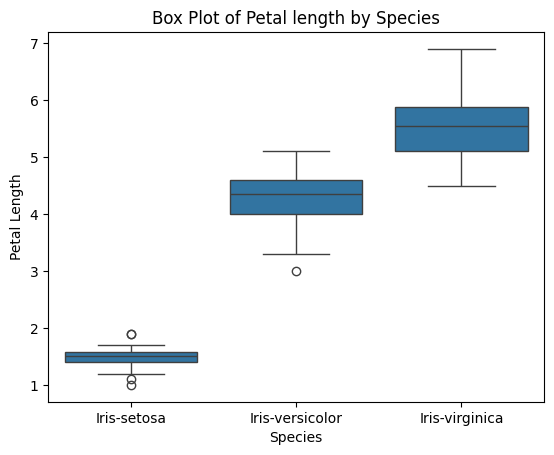

In [ ]:
sns.boxplot(data=df, x="Species", y="PetalLengthCm")

plt.title("Box Plot of Petal length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")


plt.show()

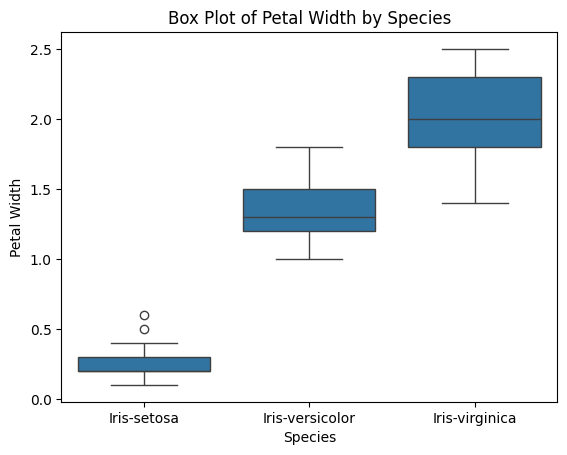

In [ ]:
sns.boxplot(data=df, x="Species", y="PetalWidthCm")

plt.title("Box Plot of Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")


plt.show()

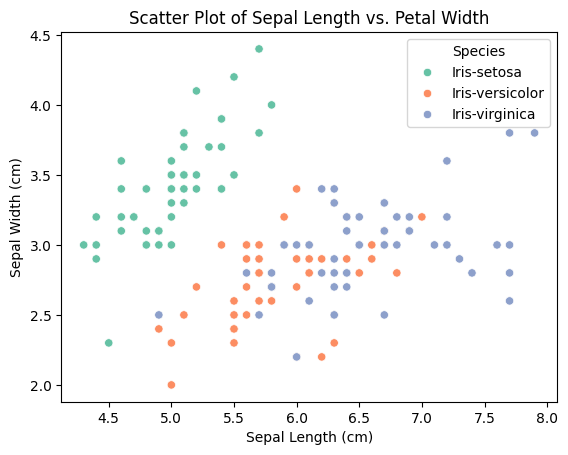

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette='Set2')


# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Petal Width')

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Specify the columns to encode
columns_to_encode = ['Species']

# Subset the data with the selected columns
data_subset = df[columns_to_encode]

# Initialize the OneHotEncoder with the updated parameter
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_data = encoder.fit_transform(data_subset.values)

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the encoded data with the original data
df_encoded = pd.concat([df, encoded_df], axis=1)


In [ ]:
df_encoded.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

In [ ]:
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


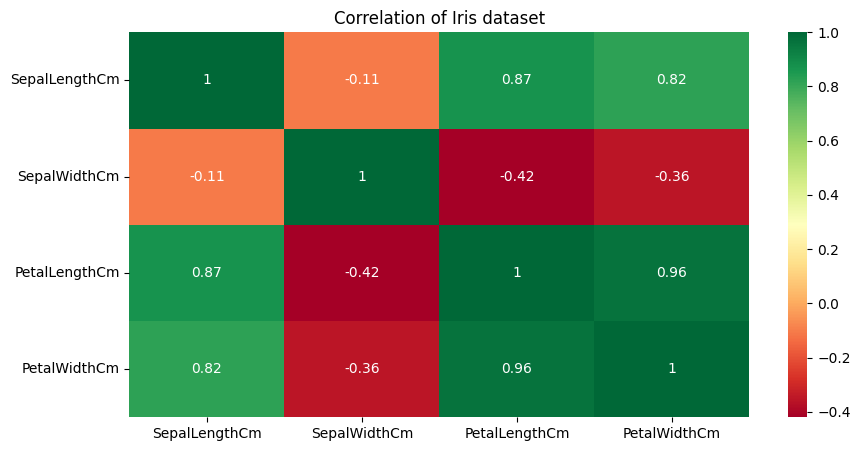

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True , cmap='RdYlGn')
plt.title("Correlation of Iris dataset")
plt.show()

In [ ]:
#Describe the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# Check unique values
df.nunique()

,0
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


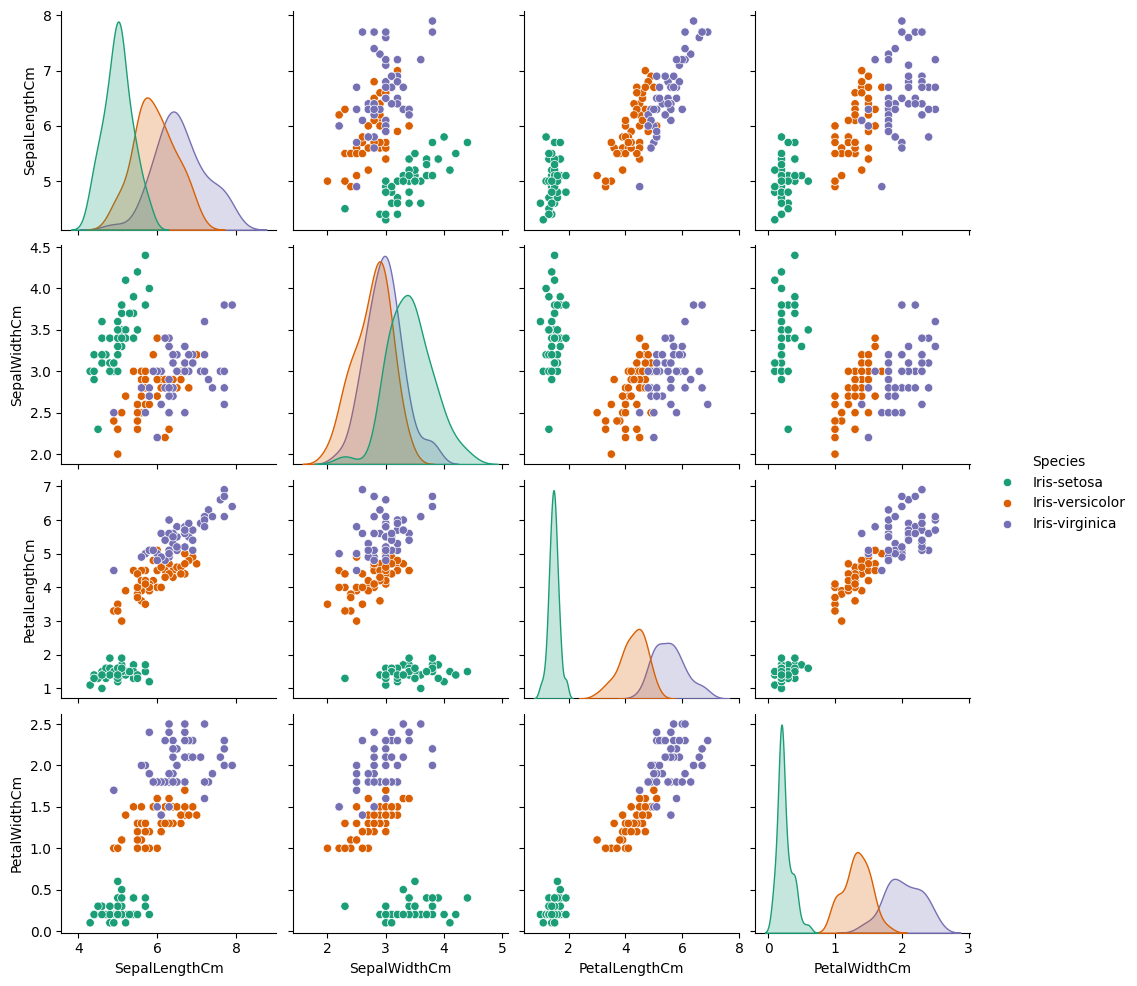

In [ ]:
# Make Pair plot
sns.pairplot(df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

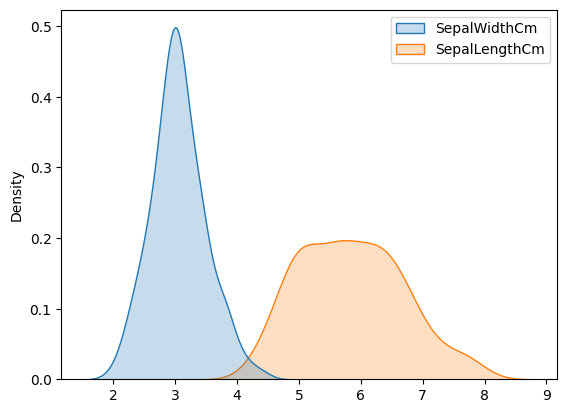

In [ ]:
plt.show()

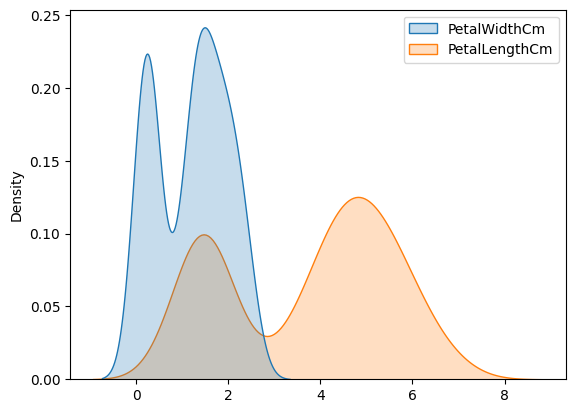

In [ ]:
sns.kdeplot(df[['PetalWidthCm', 'PetalLengthCm']], fill=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_encoded.drop('Species', axis=1)
y = df_encoded['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

Precision: 1.0
